<a href="https://colab.research.google.com/github/alkindis/toShow/blob/main/_Horsepower_Acceleration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Yasser Al Kindi DFEDATA6**
# Practical Machine Learning 
### Project: Model Selection


# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Fuel consumption data set for classic cars - mainly from the 1970's
!wget https://raw.githubusercontent.com/alkindis/DFE_Project/main/auto_mpg.csv

--2022-03-18 13:02:15--  https://raw.githubusercontent.com/alkindis/DFE_Project/main/auto_mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18152 (18K) [text/plain]
Saving to: ‘auto_mpg.csv.2’

auto_mpg.csv.2      100%[===================>]  17.73K  --.-KB/s    in 0.001s  

2022-03-18 13:02:15 (13.3 MB/s) - ‘auto_mpg.csv.2’ saved [18152/18152]



In [ ]:
data = pd.read_csv ('auto_mpg.csv')
data = data.iloc[ :350, : ]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140,3449.0,10.5,70.0,1.0,ford torino


### Q. Define the problem domain

In [ ]:
# There are many factors which may affect a cars’ acceleration, I want to show that horsepower is not the main predictor. 
# I will be building a REGRESSION model to see if horsepower is a predictor of acceleration

### Q. Identify candidate questions for your machine learning project

In [ ]:
# value_counts () - this will give CARDINALITY of the data, and also help in deciding which columns should be kept/dropped.
# Discrete or continuous numbers will decide how to clean missing data (if any)
# Which column should the label, what columns should be evaluated to become features
# Does the dataset need any cleaning?
# Do we have enough data? (we have >50 rows which is enough for a ML model)

### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
data.describe().T
#std tells me there are ourtliers

,count,mean,std,min,25%,50%,75%,max
mpg,350.0,22.524286,7.568295,9.0,16.275,21.0,27.35,46.6
cylinders,350.0,5.591429,1.736655,3.0,4.000,6.0,8.00,8.0
displacement,350.0,201.207143,107.274028,68.0,98.750,156.0,302.00,455.0
horsepower,350.0,107.291429,39.569831,46.0,78.000,95.5,136.75,230.0
weight,350.0,3026.640000,873.704016,1613.0,2231.000,2902.5,3717.00,5140.0
acceleration,350.0,15.426571,2.773453,8.0,13.500,15.4,17.00,24.8
model year,350.0,75.237143,3.248679,70.0,73.000,75.0,78.00,81.0
origin,350.0,1.548571,0.784291,1.0,1.000,1.0,2.00,3.0


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
# MCAR - although lunlikey to be missing completely at random, MCAR values tend to not be affected by other variables, 
#        i.e. missing completely for random reasons.
# MAR - more common than MCAR, where given the observed data, data is missing independently of unobserved data.​ 
#        Column will be available at training, not during production.
# MNAR - Here we may KNOW some data will be missing, i.e. it is not random. e.g. people chosing not to share salary information. 
data.info()
# This confirms no NULL values, also info on column data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           350 non-null    float64
 1   cylinders     350 non-null    float64
 2   displacement  350 non-null    float64
 3   horsepower    350 non-null    int64  
 4   weight        350 non-null    float64
 5   acceleration  350 non-null    float64
 6   model year    350 non-null    float64
 7   origin        350 non-null    float64
 8   car name      350 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 24.7+ KB


In [ ]:
#dropping 'car name' column - not relevant to problem statement
data = data.drop(columns = 'car name')

Q. Is there any correlation in the data? How would you decide which columns to keep?

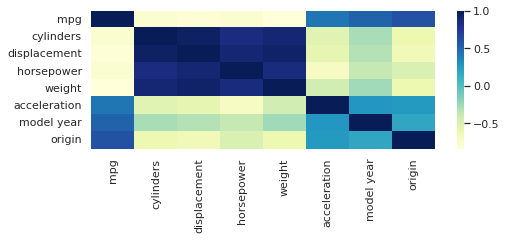

In [ ]:
crr = data.corr()
sns.heatmap (crr, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(6,6)})
# I will keep all columns (except 'car name') - as am looking to see regression between highest and lowest correlations.

Q. Is there any imbalance in the label
?

In [ ]:
for cname in data.columns:
  print (cname, end = " ")
  print(data[cname].value_counts().count())

# Since this is a REGRESSION problem - no action is required here since the data set will be reshuffled at train_test_split stage. 
  # In a CLASSIFICATION problem, we can deal with imbalance in classes by;
  # 1) Del some of the rows of the larger dataset!
  # 2) Generate SIMULATED data 
  # 3) Ignore

mpg 116
cylinders 5
displacement 77
horsepower 91
weight 316
acceleration 87
model year 12
origin 3


Q. Are there any outliers in the dataset? What do you do with them?

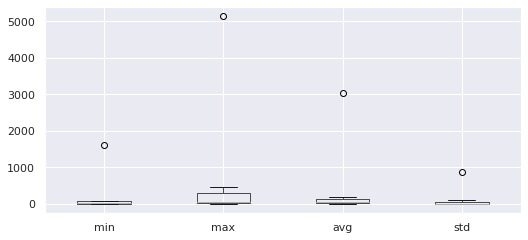

In [ ]:
# Visualise outliers
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
min = data.min(0)
max = data.max(0)
avg = data.mean(0)
std = data.std(0)
df = pd.DataFrame(dict(min=min, max=max, avg=avg, std=std))
df.boxplot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98a1cdffd0>,
      dtype=object)

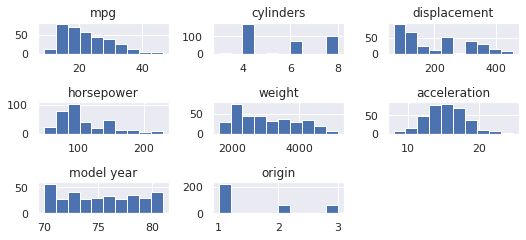

In [ ]:
# Handling Outliers
  # 1) Remove them 
  # 2) Replace all >3 with max, <-3 with min
  # 3) Ignore
# There are only 4 outliers, ]
data.hist()

# Extreme left or right sided distribution shows there are outliers - 'acceleration' for example has NO outliers.

In [ ]:
# Here I will use FLOORING AND CAPPING to deal with outliers. 
# i.e. floor lower values to quartile 1 (Q1) and cap the higher values at the 75th percentile.

import numpy as np
Q1 = data['mpg'].quantile(0.25)
Q3 = data['mpg'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

data['mpg'] = np.where(data['mpg'] > upper_whisker, upper_whisker, np.where(data['mpg'] < lower_whisker, lower_whisker, data['mpg']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


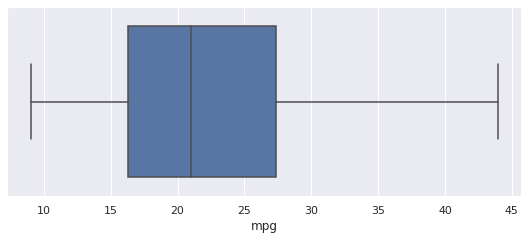

In [ ]:
#running boxplot to check if outliers are out of the 'mpg' column
sns.boxplot(data['mpg'], data = data)

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [ ]:
# the 'car name' column is str - but i will not be converting at this stage since it does not affect outcome. Also, it has been removed (above). 

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [ ]:
y = data.loc [:, 'horsepower']
x = data.iloc [:, :-1]

# Poor distribution of test/train (AKA scoring data) can throw off the model, and can cause under or overfitting - depends on the case. 

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y,
                                             test_size=0.2, random_state=42)

In [ ]:
mu,sigma = xtrain.describe().T['mean'] , xtrain.describe().T['std']
norm_xdata = (xtrain - mu)/sigma
norm_xdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
228,-0.522289,0.199251,0.426662,-0.246678,0.538830,1.301247,0.518518
78,-0.195942,-0.951063,-0.778141,-0.524472,-0.079115,1.481743,-1.029298
90,-1.370792,1.349564,2.085584,2.278727,2.153861,-1.406192,-0.719734
16,-0.587559,0.199251,-0.045991,-0.271932,-0.311127,0.037775,-1.648424
66,-0.718098,1.349564,0.927119,1.066533,0.705200,-1.406192,-1.029298


# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


ntree1, ntree2 = 50,100
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(accuracy_score(predictions, ytest))

# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers


0.4857142857142857
0.5
0.7285714285714285
0.7
0.1
0.014285714285714285


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [ ]:
# Based on the accuracy, I will say that 'DecisionTreeClassifier' is the best model at predicting.
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)

model.fit(xtrain,ytrain)

p = model.predict(xtest)

cross_val_score(model, x, y, cv=10)

array([0.99506404, 0.99916481, 0.99932237, 0.99445088, 0.99982021,
       0.99953647, 0.99974953, 0.9986303 , 0.99680006, 0.99931688])

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/